# Latency analysis

## Set up

In [1]:
suppressMessages({
    require(data.table, quietly=TRUE)
    require(ggplot2, quietly=TRUE)
    require(magrittr, quietly=TRUE)
    require(quantreg, quietly=TRUE)
    require(VGAM, quietly=TRUE)
})

## Benchmark cluster

### Read data

In [2]:
benchmarkLatencies <- fread("../data/BenchTopology/latency.csv.gz", stringsAsFactors=TRUE)
benchmarkLatencies %>% summary

     source            dest             size            time        
 node-0 :  4320   node-1 :  5040   Min.   :   24   Min.   :  0.103  
 node-10:  4320   node-2 :  5040   1st Qu.:   24   1st Qu.:  0.201  
 node-11:  4320   node-0 :  4320   Median :   64   Median :  0.613  
 node-12:  4320   node-10:  4320   Mean   :21867   Mean   : 62.821  
 node-13:  4320   node-11:  4320   3rd Qu.:65515   3rd Qu.: 90.500  
 node-14:  4320   node-12:  4320   Max.   :65515   Max.   :290.000  
 (Other):198719   (Other):197279                                    
 source_region dest_region
 AP:73440      AP:74160   
 EU:77760      EU:76320   
 US:73439      US:74159   
                          
                          
                          
                          

### Latency by region

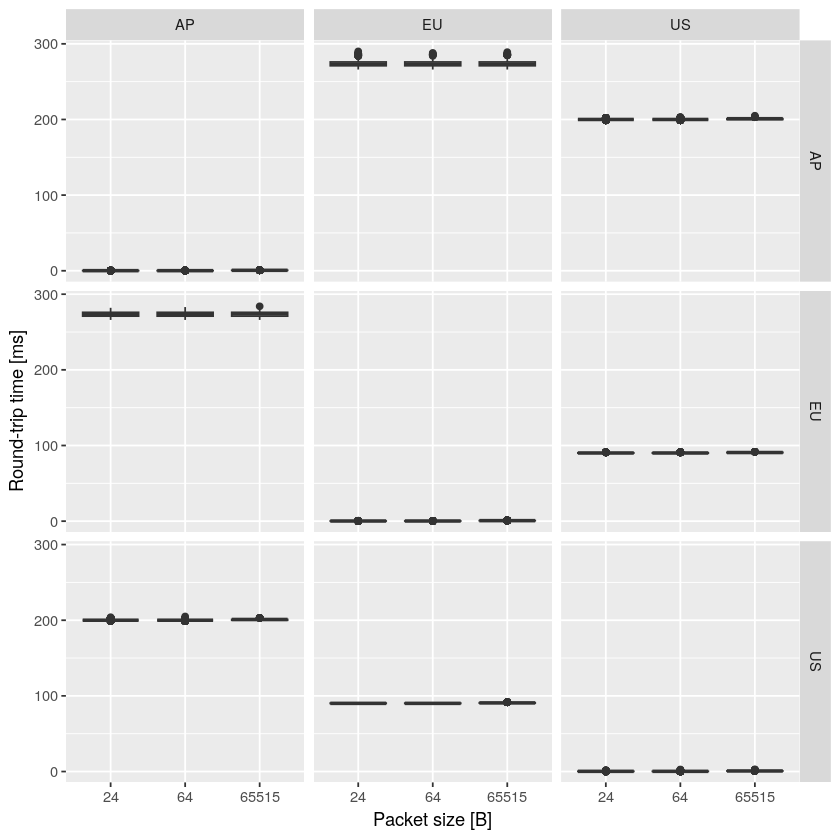

In [3]:
ggplot(benchmarkLatencies, aes(x=factor(`size`), y=`time`)) +
    geom_boxplot() +
    facet_grid(`source_region` ~ `dest_region`) +
    xlab("Packet size [B]") +
    ylab("Round-trip time [ms]")

In [4]:
ggsave("benchmark-latency-grid.png", units="in", dpi=150, width=8, height=6)

In [5]:
ggsave("benchmark-latency-grid.svg", units="in", dpi=150, width=8, height=6)

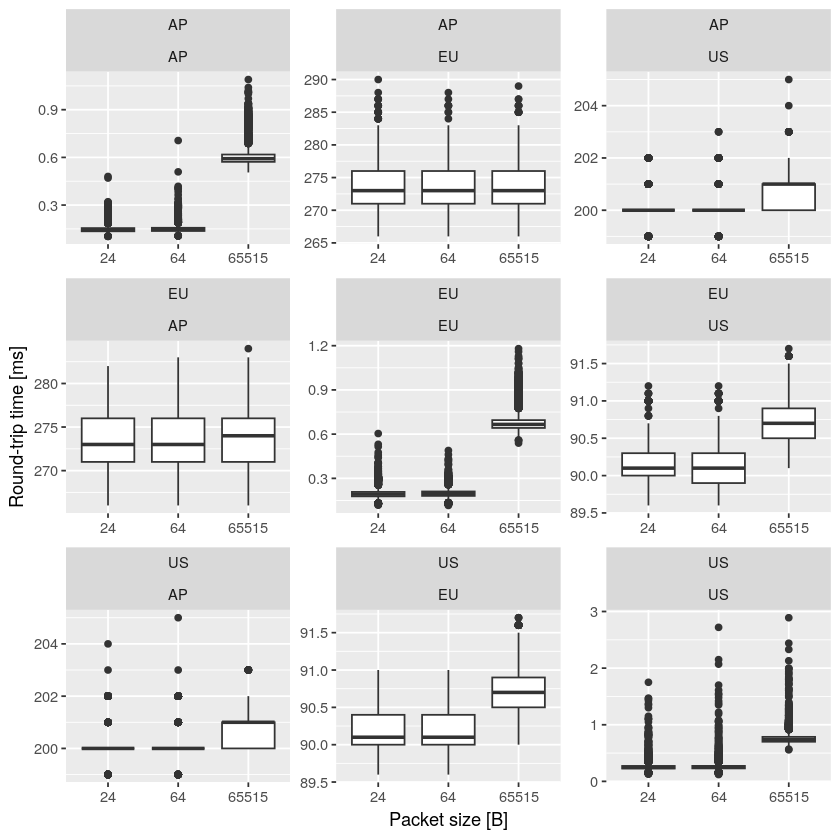

In [6]:
ggplot(benchmarkLatencies, aes(x=factor(`size`), y=`time`)) +
    geom_boxplot() +
    facet_wrap(`source_region` ~ `dest_region`, scales="free") +
    xlab("Packet size [B]") +
    ylab("Round-trip time [ms]")

In [7]:
ggsave("benchmark-latency-wrap.png", units="in", dpi=150, width=8, height=6)

In [8]:
ggsave("benchmark-latency-wrap.svg", units="in", dpi=150, width=8, height=6)